# Neural Networks, Tensorflow, Deep Learning

### Me: Adrin [adrin.info](http://adrin.info)


### Ancud IT-Beratung [ancud.de](https://ancud.de)
![ancud](figs/ancud.png)





#### Requirements: 

 - python3
 - ipython
 - notebook (jupyter)
 - matplotlib
 - numpy, pandas
 - keras
 - tensorflow


## Neural Networks

### A single neuron

![spiking neural network](http://lis2.epfl.ch/CompletedResearchProjects/EvolutionOfAdaptiveSpikingCircuits/images/neuron.jpg)

### Spiking Neural Networks

![spiking system](http://lis2.epfl.ch/CompletedResearchProjects/EvolutionOfAdaptiveSpikingCircuits/images/spiking.jpg)


### Artificial Neuron (Perceptron - 1957)
[Source](http://natureofcode.com/book/chapter-10-neural-networks/)

![](http://natureofcode.com/book/imgs/chapter10/ch10_05.png)

$$output = f(x \times w_x + y \times w_y)$$
$$f(x) = sign(x)$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Signum_function.svg/200px-Signum_function.svg.png)

### Classification

![](http://natureofcode.com/book/imgs/chapter10/ch10_04.png)

#### Add bias
![](http://natureofcode.com/book/imgs/chapter10/ch10_06.png)

$$output = f(x \times w_x + y \times w_y + bias \times w_{bias})$$
$$f(x) = sign(x)$$


#### Feed the data
![](http://natureofcode.com/book/imgs/chapter10/ch10_07.png)

### Excercise: derive the weight update formula.


$$output = sign(x \times w_x + y \times w_y + b \times w_b)$$

$$error = desired - output$$

$$w_{new} = w + \Delta w$$

$$\Delta w = error \times input$$

$$\Delta w =  error \times input \times \text{learning rate}$$

## Classification

### Logical OR

#### Initialize variables

In [149]:
import numpy as np
import math

sign = lambda x: math.copysign(1, x)

def f(X, W):
    return sign(sum([x * w for x, w in zip(X, W)]))

data = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1],
                 [1, 1, 1]])
output = np.array([-1, 1, 1, 1])

W = np.random.normal(0, size=3)

#### Error

In [150]:
for i in range(len(data)):
    print('desired: %2d, expected: %2d, error: %2d' % 
          (f(data[i], W), 
           output[i],
           output[i] - f(data[i], W)))

desired: -1, expected: -1, error:  0
desired:  1, expected:  1, error:  0
desired: -1, expected:  1, error:  2
desired: -1, expected:  1, error:  2


In [18]:
def total_error(X, W, y):
    return sum([abs(y[i] - f(X[i,], W)) for i in range(len(X))])

#### Update Weights

In [19]:
def new_w(X, W, y, learning_rate):
    output = f(X, W)
    error = y - output
    delta_w = np.array([error * x * learning_rate for x in X])
    return W + delta_w

#### Train

In [151]:
learning_rate = 0.5
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  4
error:  4, W: [ 2.30677987 -1.06664309  0.61521604]
error:  2, W: [ 2.30677987 -0.06664309  0.61521604]
error:  2, W: [2.30677987 0.93335691 0.61521604]
error:  0, W: [ 2.30677987  0.93335691 -0.38478396]


### Logical AND

#### Initialize variables

In [153]:
data = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1],
                 [1, 1, 1]])
output = np.array([-1, -1, -1, 1])

W = np.random.normal(0, size=3)

#### Train

In [154]:
learning_rate = 0.5
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  6
error:  6, W: [-0.12756509  0.94978059  0.53770613]
error:  4, W: [ 0.87243491  0.94978059 -0.46229387]
error:  4, W: [ 0.87243491  1.94978059 -0.46229387]
error:  2, W: [ 0.87243491  1.94978059 -1.46229387]
error:  4, W: [ 1.87243491  1.94978059 -1.46229387]
error:  0, W: [ 0.87243491  1.94978059 -2.46229387]


### Demo
http://natureofcode.com/book/chapter-10-neural-networks/

https://bit.ly/1QwqTmA

### Logical XOR

#### Initialize variables

In [157]:
data = np.array([[0, 0, 1],
                 [1, 0, 1],
                 [0, 1, 1],
                 [1, 1, 1]])
output = np.array([-1, 1, 1, -1])

W = np.random.normal(0, size=3)

#### Train

In [164]:
learning_rate = 0.1
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
    print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  4
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  4, W: [-0.35259378 -0.47298198  0.380

#### Train (observe more closely)

In [165]:
learning_rate = 0.1
print('starting error: %2g' % total_error(data, W, output))

for epoch in range(100):
    for i in range(len(data)):
        W = new_w(data[i,:], W, output[i], learning_rate)
        
        print('error: %2g, W: %s' % (total_error(data, W, output), str(W)))
    if total_error(data, W, output) == 0:
        break

starting error:  4
error:  6, W: [-0.35259378 -0.47298198  0.18096587]
error:  4, W: [-0.15259378 -0.47298198  0.38096587]
error:  4, W: [-0.15259378 -0.27298198  0.58096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  6, W: [-0.35259378 -0.47298198  0.18096587]
error:  4, W: [-0.15259378 -0.47298198  0.38096587]
error:  4, W: [-0.15259378 -0.27298198  0.58096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  6, W: [-0.35259378 -0.47298198  0.18096587]
error:  4, W: [-0.15259378 -0.47298198  0.38096587]
error:  4, W: [-0.15259378 -0.27298198  0.58096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  6, W: [-0.35259378 -0.47298198  0.18096587]
error:  4, W: [-0.15259378 -0.47298198  0.38096587]
error:  4, W: [-0.15259378 -0.27298198  0.58096587]
error:  4, W: [-0.35259378 -0.47298198  0.38096587]
error:  6, W: [-0.35259378 -0.47298198  0.18096587]
error:  4, W: [-0.15259378 -0.47298198  0.38096587]
error:  4, W: [-0.15259378 -0.27298198  0.580

### Linear Separability

![](http://natureofcode.com/book/imgs/chapter10/ch10_12.png)
![](http://natureofcode.com/book/imgs/chapter10/ch10_13.png)


#### Multilayer perceptron
![](http://natureofcode.com/book/imgs/chapter10/ch10_14.png)

## Regression

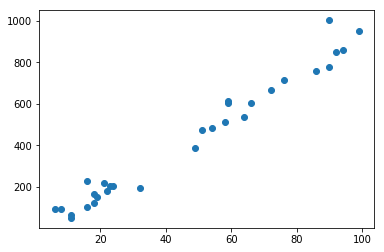

In [14]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(100, size=30)
y = 10 * x - 40 + np.random.normal(size=30) * 40

x = x.reshape(-1, 1)
data = np.hstack((x, np.ones_like(x)))

plt.scatter(x, y)

In [7]:
def f(X, W):
    return sum([x * w for x, w in zip(X, W)])

def new_w(X, W, y, learning_rate):
    output = f(X, W)
    error = y - output
    delta_w = np.array([error * x * learning_rate for x in X])
    return W + delta_w

def total_error(X, W, y):
    return sum([abs(y[i] - f(X[i,], W)) for i in range(len(X))])

In [35]:
learning_rate = 0.00001
W = np.random.normal(size=2)

for epoch in range(20000):
    if epoch % 2000 == 0:
        print('error: %2g, W: %s' % (total_error(data, W, y), str(W)))
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)

error: 12668.9, W: [ 0.15565692 -0.33388966]
error: 1132.35, W: [ 9.32385567 -3.39611448]
error: 1126.58, W: [ 9.36432699 -6.07121385]
error: 1121.75, W: [ 9.39818968 -8.30949269]
error: 1117.71, W: [  9.4265229  -10.18227999]
error: 1114.33, W: [  9.45022954 -11.74925737]
error: 1112.4, W: [  9.4700651  -13.06036092]
error: 1111.66, W: [  9.48666168 -14.15737263]
error: 1111.04, W: [  9.50054818 -15.07525184]
error: 1110.52, W: [  9.51216714 -15.84324933]


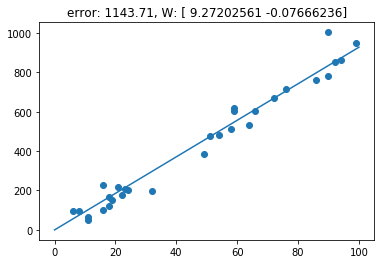

In [27]:
from IPython.display import clear_output
import time

def plot(data, y, W):
    plt.scatter(data[:,0], y)
    plt.plot([0, 100], [f([0, 1], W), f([100, 1], W)])
    plt.title('error: %2g, W: %s' % (total_error(data, W, y), str(W)))
    plt.show()
    
learning_rate = 0.00001
W = np.random.normal(size=2)

for epoch in range(10):
    clear_output()
    plot(data, y, W)
    time.sleep(1)
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)

#### Dynamic Learning Rate

In [40]:
learning_rate = 0.0001
W = np.random.normal(size=2)

for epoch in range(20000):
    if epoch % 2000 == 0:
        print('error: %2g, W: %s, lr: %4g' % (total_error(data, W, y), str(W), learning_rate))
        learning_rate = learning_rate * 0.9
        
    for i in range(len(data)):
        W = new_w(data[i,], W, y[i], learning_rate)
        
    if total_error(data, W, y) == 0:
        break

error: 13202.1, W: [-0.21198259 -0.90185071], lr: 0.0001
error: 1270.45, W: [  9.0033396 -18.3187657], lr: 9e-05
error: 1225.57, W: [  9.11353097 -21.46810477], lr: 8.1e-05
error: 1192.25, W: [  9.17965501 -21.99779733], lr: 7.29e-05
error: 1162.36, W: [  9.2347146  -21.97840217], lr: 6.561e-05
error: 1139.07, W: [  9.28425795 -21.83033219], lr: 5.9049e-05
error: 1117.79, W: [  9.32897982 -21.65207252], lr: 5.31441e-05
error: 1101.08, W: [  9.36883341 -21.47095735], lr: 4.78297e-05
error: 1091.57, W: [  9.40381812 -21.29637669], lr: 4.30467e-05
error: 1088.3, W: [  9.43410063 -21.13227384], lr: 3.8742e-05


## Iterative Approach
![](./figs/iterative.png)

![](figs/loss1.png)

![](figs/loss2.png)

![](figs/loss3.png)

![](figs/loss4.png)

![](figs/lr1.png)

![](figs/lr2.png)

![](figs/lr3.png)

#### Playground
https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

https://bit.ly/2vmmqUX

![](figs/pl0.png)

## Architectures

### Feedforward
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/560px-Artificial_neural_network.svg.png)

### Activation Functions: [wiki](https://en.wikipedia.org/wiki/Activation_function)
https://en.wikipedia.org/wiki/Activation_function

![](./figs/activation-funcs.png)

### Playground

https://bit.ly/2ETsjsc

![](figs/playground.png)

### Recurrent
![](https://upload.wikimedia.org/wikipedia/commons/7/79/Recurrent_ann_dependency_graph.png)

#### Elman SRNN
![](https://upload.wikimedia.org/wikipedia/commons/8/8f/Elman_srnn.png)

### Unsupervised, eg. SOM
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Somtraining.svg/1000px-Somtraining.svg.png)

## New developments

### General-purpose computing on graphics processing units (GPGPU)

#### GPU vs CPU
![](http://www.frontiersin.org/files/Articles/70265/fgene-04-00266-HTML/image_m/fgene-04-00266-g001.jpg)

#### 2005
![](figs/gpgpu.png)

### Better algorithms

#### 2011
![](figs/2011-conv-mnist.png)


## Convolutional Neural Networks (CNN)

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

### Weight Sharing, Convolution

### Max Pooling
![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

### Dropout, {L1, L2} regularization, artificial data, etc.

## NN Libraries

![](figs/nn-libs.png)

### Keras
#### keras.io

![](figs/keras.png)

# MNIST

![](http://andrea.burattin.net/public-files/stuff/handwritten-digit-recognition/example_mnist.gif)


# MNIST

![](figs/mnist-perfs.png)

### Based on keras examples, specifically [this one](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py)

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [4]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### Keras
https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

https://bit.ly/2HzzSKp

### Good old scikit-learn & linear regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('variance filter', VarianceThreshold(threshold=0.01)),
    ('standard_scale', StandardScaler()),
    ('estimator', Lasso(alpha=0.1, max_iter=2000)),
])

pipeline.fit(x_train.reshape(60000, -1), y_train)

In [8]:
from sklearn.metrics import label_ranking_average_precision_score
label_ranking_average_precision_score(y_test, pipeline.predict(x_test.reshape(len(x_test), -1)))

0.47789595238095106

In [9]:
label_ranking_average_precision_score(y_test, model.predict(x_test))

0.99532500000000002

## TensorFlow

![](figs/tf-layers.png)

## TensorFlow

![](figs/tf-layers2.png)

### Tensorboard
    tensorboard --logdir=path/to/log-directory
    
![](figs/tensorboard.png)

### Intro

- building the graph vs computing the graph
- inputs/constants/variables
- gradients and training

#### Tutorial (up to tf.contrib.learn)
https://www.tensorflow.org/versions/r1.1/get_started/get_started#the_computational_graph

https://bit.ly/2HsDf5A

### Tensorboard
    tensorboard --logdir=path/to/log-directory

### MNIST with TF

- First tutorial:
  - https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners
  - https://bit.ly/2H83QBG
- Second Tutorial:
  - https://www.tensorflow.org/versions/r1.1/get_started/mnist/pros
  - https://bit.ly/2JQUOe5

### Convolution Kernels
![](figs/convolution-kernels.png)
[Source](https://www.jebruner.com/2017/07/interpreting-and-fooling-convolutional-neural-networks-part-1/)

## Interpret CNNs

![](figs/cnn1.png)

## Interpret CNNs

![](figs/cnn2.png)

## Interpret CNNs

![](figs/cnn3.png)

## Interpret CNNs

![](figs/cnn4.png)

## Interpret CNNs

![](figs/cnn5.png)

### How convolutional neural networks see the world

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

https://bit.ly/2oLWXx3

![](figs/cnn-interpret.png)

### Classification

![](figs/normal.jpg)

### Adding classes

![](figs/added-nodes.jpg)

### Dimentionality reduction / Transfer learning

![](figs/dimentionality-reduction.jpg)


### Dimentionality reduction / Transfer learning

![](figs/dimentionality-reduction-2.jpg)

## More TF

### High level APIs

#### tf.keras

![](figs/tf-keras.png)

### High level APIs

#### tf.estimator

![](figs/tf-estimator.png)

### input_fn

In [ ]:
    def train_input_fn(features, labels, batch_size):
        """An input function for training"""
        # Convert the inputs to a Dataset.
        dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

        # Shuffle, repeat, and batch the examples.
        dataset = dataset.shuffle(1000).repeat().batch(batch_size)

        # Return the read end of the pipeline.
        return dataset.make_one_shot_iterator().get_next()

### model_fn

In [ ]:
def my_model_fn(
   features, # This is batch_features from input_fn
   labels,   # This is batch_labels from input_fn
   mode,     # An instance of tf.estimator.ModeKeys
   params):  # Additional configuration

In [ ]:
classifier = tf.estimator.Estimator(
    model_fn=my_model,
    params={
        'feature_columns': my_feature_columns,
        # Two hidden layers of 10 nodes each.
        'hidden_units': [10, 10],
        # The model must choose between 3 classes.
        'n_classes': 3,
    })

### Complete Code

In [ ]:
#  Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""An Example of a custom Estimator for the Iris dataset."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import tensorflow as tf

import iris_data

parser = argparse.ArgumentParser()
parser.add_argument('--batch_size', default=100, type=int, help='batch size')
parser.add_argument('--train_steps', default=1000, type=int,
                    help='number of training steps')

def my_model(features, labels, mode, params):
    """DNN with three hidden layers, and dropout of 0.1 probability."""
    # Create three fully connected layers each layer having a dropout
    # probability of 0.1.
    net = tf.feature_column.input_layer(features, params['feature_columns'])
    for units in params['hidden_units']:
        net = tf.layers.dense(net, units=units, activation=tf.nn.relu)

    # Compute logits (1 per class).
    logits = tf.layers.dense(net, params['n_classes'], activation=None)

    # Compute predictions.
    predicted_classes = tf.argmax(logits, 1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        predictions = {
            'class_ids': predicted_classes[:, tf.newaxis],
            'probabilities': tf.nn.softmax(logits),
            'logits': logits,
        }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # Compute loss.
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Compute evaluation metrics.
    accuracy = tf.metrics.accuracy(labels=labels,
                                   predictions=predicted_classes,
                                   name='acc_op')
    metrics = {'accuracy': accuracy}
    tf.summary.scalar('accuracy', accuracy[1])

    if mode == tf.estimator.ModeKeys.EVAL:
        return tf.estimator.EstimatorSpec(
            mode, loss=loss, eval_metric_ops=metrics)

    # Create training op.
    assert mode == tf.estimator.ModeKeys.TRAIN

    optimizer = tf.train.AdagradOptimizer(learning_rate=0.1)
    train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)


def main(argv):
    args = parser.parse_args(argv[1:])

    # Fetch the data
    (train_x, train_y), (test_x, test_y) = iris_data.load_data()

    # Feature columns describe how to use the input.
    my_feature_columns = []
    for key in train_x.keys():
        my_feature_columns.append(tf.feature_column.numeric_column(key=key))

    # Build 2 hidden layer DNN with 10, 10 units respectively.
    classifier = tf.estimator.Estimator(
        model_fn=my_model,
        params={
            'feature_columns': my_feature_columns,
            # Two hidden layers of 10 nodes each.
            'hidden_units': [10, 10],
            # The model must choose between 3 classes.
            'n_classes': 3,
        })

    # Train the Model.
    classifier.train(
        input_fn=lambda:iris_data.train_input_fn(train_x, train_y, args.batch_size),
        steps=args.train_steps)

    # Evaluate the model.
    eval_result = classifier.evaluate(
        input_fn=lambda:iris_data.eval_input_fn(test_x, test_y, args.batch_size))

    print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

    # Generate predictions from the model
    expected = ['Setosa', 'Versicolor', 'Virginica']
    predict_x = {
        'SepalLength': [5.1, 5.9, 6.9],
        'SepalWidth': [3.3, 3.0, 3.1],
        'PetalLength': [1.7, 4.2, 5.4],
        'PetalWidth': [0.5, 1.5, 2.1],
    }

    predictions = classifier.predict(
        input_fn=lambda:iris_data.eval_input_fn(predict_x,
                                                labels=None,
                                                batch_size=args.batch_size))

    for pred_dict, expec in zip(predictions, expected):
        template = ('\nPrediction is "{}" ({:.1f}%), expected "{}"')

        class_id = pred_dict['class_ids'][0]
        probability = pred_dict['probabilities'][class_id]

        print(template.format(iris_data.SPECIES[class_id],
                              100 * probability, expec))


if __name__ == '__main__':
    tf.logging.set_verbosity(tf.logging.INFO)
tf.app.run(main)

### Tutorial

- https://www.tensorflow.org/get_started/custom_estimators
- https://bit.ly/2HIq7qJ

## The real deal

https://www.tensorflow.org/tutorials/layers

https://bit.ly/2HcRcVV

![](figs/real-deal.png)

### Inception-V3

https://arxiv.org/pdf/1512.00567.pdf

https://bit.ly/2uWBuHs

![](figs/inception-v3.png)

### Pixelwise Segmentation

![](figs/pixelwise.png)

### Pixelwise Segmentation
#### DeepLab-v3+

![](figs/deeplab-v3.png)

## Links

- General Intro
  - https://arxiv.org/pdf/1404.7828.pdf
- Convolutions
  - https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d
  - https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/
- CNNs
  - https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/
- Good old LSTM paper
  - http://web.eecs.utk.edu/~itamar/courses/ECE-692/Bobby_paper1.pdf
- Advanced Tutorials
  - https://www.tensorflow.org/tutorials/layers
  -https://bit.ly/2HcRcVV
- Inception Paper (included in the tutorials)
  - https://arxiv.org/pdf/1512.00567.pdf
  - https://github.com/tensorflow/models/blob/master/research/inception/inception/slim/inception_model.py
- Pixelwise Segmentation (DeepLab-v3+)
  - Blog post
    - https://research.googleblog.com/2018/03/semantic-image-segmentation-with.html
    - https://bit.ly/2JTrjrY
  - Repository
    - https://github.com/tensorflow/models/tree/master/research/deeplab
    - https://bit.ly/2GClDkT
  - Other
    - https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf
    - https://research.googleblog.com/2018/03/mobile-real-time-video-segmentation.html
- AutoML related
  - https://research.googleblog.com/2017/05/using-machine-learning-to-explore.html
- Transfer Learning
  - https://github.com/MorvanZhou/Tensorflow-Tutorial/blob/master/tutorial-contents/407_transfer_learning.py
  - http://cs231n.github.io/transfer-learning/

# Final remarks

 - Usecases with not enough data
 - Usecases with many small models
 - Gain on performance vs. cost
 - Network architecture & hyperparameters
 - Deployment
   - Cleanup
   - Batching
   - Serving